# Dataset 4

## https://archive.ics.uci.edu/dataset/301/parkinson+speech+dataset+with+multiple+types+of+sound+recordings

In [14]:
import pandas as pd

In [20]:
data = pd.read_csv('../Dataframes/dataset4.csv')
cols = ['subject_id', 'jitter_local', 'jitter_local_absolute', 'jitter_rap', 'jitter_ppq5', 'jitter_ddp', 'shimmer_local', 
        'shimmer_local_db', 'shimmer_apq3', 'shimmer_apq5', 'shimmer_apq11', 'shimmer_dda', 'ac', 'nth', 'htn', 'median_pitch', 
        'mean_pitch', 'standard_deviation', 'minimum_pitch', 'maximum_pitch', 'number_of_pulses', 'number_of_periods', 'mean_period', 
        'standard_deviation_of_period', 'fraction_of_locally_unvoiced_frames', 'number_of_voice_breaks', 'degree_of_voice_breaks', 
        'updrs', 'class_information']
data.columns = cols
data.head()
data.head()

,subject_id,jitter_local,jitter_local_absolute,jitter_rap,jitter_ppq5,jitter_ddp,shimmer_local,shimmer_local_db,shimmer_apq3,shimmer_apq5,...,maximum_pitch,number_of_pulses,number_of_periods,mean_period,standard_deviation_of_period,fraction_of_locally_unvoiced_frames,number_of_voice_breaks,degree_of_voice_breaks,updrs,class_information
0,1,0.728,0.000038,0.353,0.376,1.059,5.864,0.642,2.058,3.180,...,234.505,170,169,0.005181,0.000403,2.247,0,0.000,23,1.0
1,1,1.220,0.000074,0.732,0.670,2.196,8.719,0.875,4.347,5.166,...,211.442,1431,1427,0.006071,0.000474,10.656,1,0.178,23,1.0
2,1,2.502,0.000123,1.156,1.634,3.469,13.513,1.273,5.263,8.771,...,220.230,94,92,0.004910,0.000320,0.000,0,0.000,23,1.0
3,1,3.509,0.000167,1.715,1.539,5.145,9.112,1.040,3.102,4.927,...,225.162,117,114,0.004757,0.000380,18.182,1,13.318,23,1.0
4,1,2.470,0.000126,1.358,1.341,4.075,10.696,1.256,5.262,7.076,...,202.812,74,73,0.005118,0.000187,23.214,0,0.000,23,1.0


In [21]:
data.shape

(1207, 29)

In [36]:
data.fillna(0, inplace = True) #Infered form a research paper based on the dataset


## XGBoost

In [37]:
import pandas as pd
import numpy as np

from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [39]:
data4 = data.copy()
data4 = data4.drop(['subject_id'], axis = 1)

In [40]:
X = data4.drop(['class_information'], axis = 1)
y = data4['class_information']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 45)

XGB_classifier = XGBClassifier(random_state=45)

XGB_classifier.fit(X_train, y_train)

y_pred = XGB_classifier.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy of the XGBoost Classifier: {accuracy:.2f}')

Accuracy of the XGBoost Classifier: 1.00


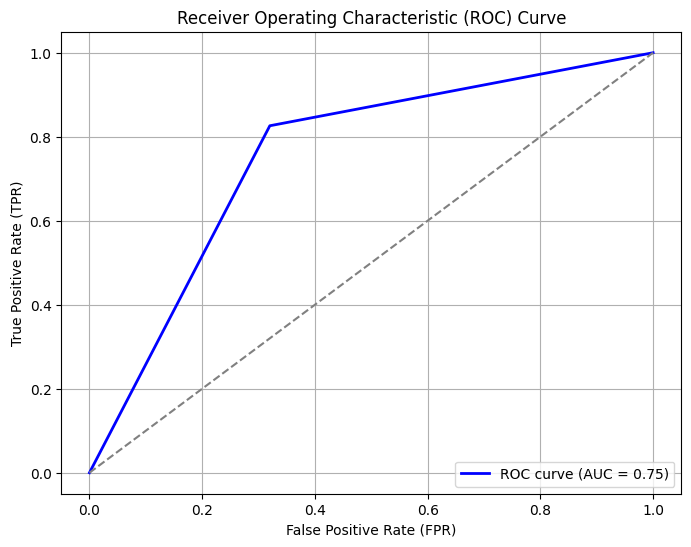

In [11]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Random guess line
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

## Support Vector Machine

In [43]:
import pandas as pd
import numpy as np

from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [44]:
data4 = data.copy()
data4 = data4.drop(['subject_id'], axis = 1)

### Linear

In [45]:
X = data4.drop(['class_information'], axis = 1)
y = data4['class_information']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 45)

SVM_classifier = SVC(random_state=45, kernel = 'linear')

SVM_classifier.fit(X_train, y_train)

y_pred = SVM_classifier.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy of the SVM Classifier: {accuracy:.2f}')


Accuracy of the SVM Classifier: 1.00


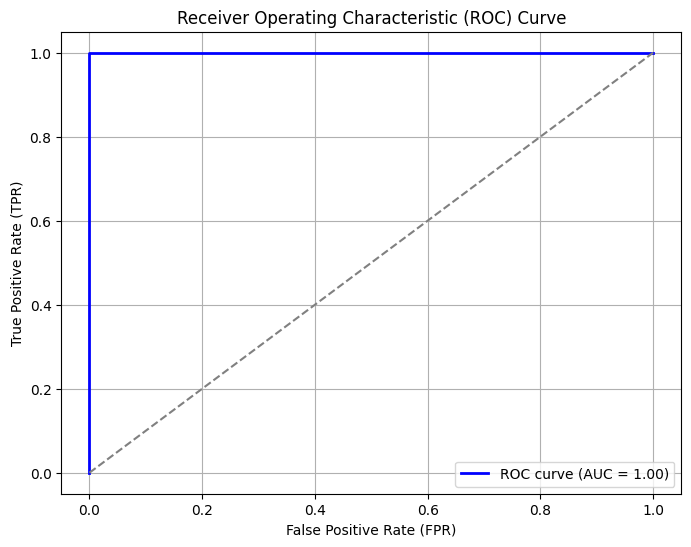

In [46]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Random guess line
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

### Polynomial

In [47]:
X = data4.drop(['class_information'], axis = 1)
y = data4['class_information']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 45)

SVM_classifier = SVC(random_state=45, kernel = 'poly')

SVM_classifier.fit(X_train, y_train)

y_pred = SVM_classifier.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy of the SVM Classifier: {accuracy:.2f}')


Accuracy of the SVM Classifier: 0.83


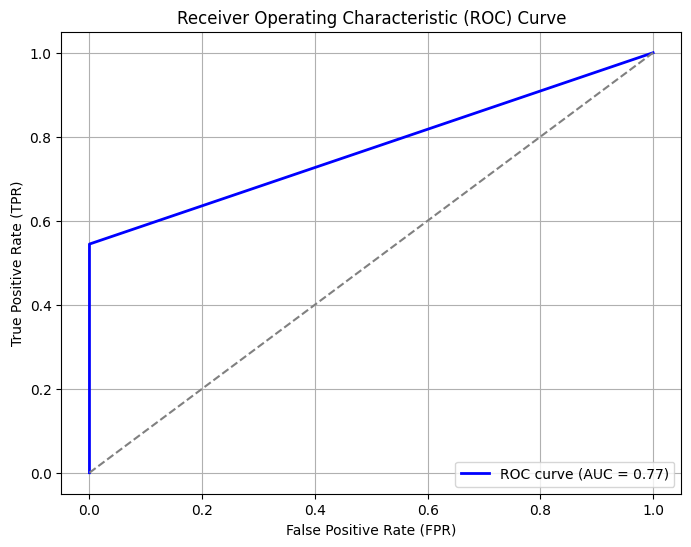

In [48]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Random guess line
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

### Radial Basis Function

In [49]:
X = data4.drop(['class_information'], axis = 1)
y = data4['class_information']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 45)

SVM_classifier = SVC(random_state=45, kernel = 'rbf')

SVM_classifier.fit(X_train, y_train)

y_pred = SVM_classifier.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy of the SVM Classifier: {accuracy:.2f}')


Accuracy of the SVM Classifier: 0.87


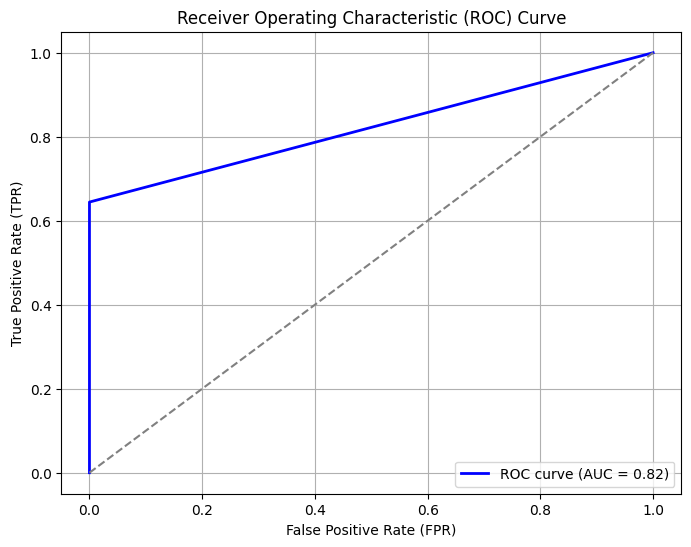

In [50]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Random guess line
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

### Sigmoid Kernel

In [51]:
X = data4.drop(['class_information'], axis = 1)
y = data4['class_information']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 45)

SVM_classifier = SVC(random_state=45, kernel = 'sigmoid')

SVM_classifier.fit(X_train, y_train)

y_pred = SVM_classifier.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy of the SVM Classifier: {accuracy:.2f}')


Accuracy of the SVM Classifier: 0.51


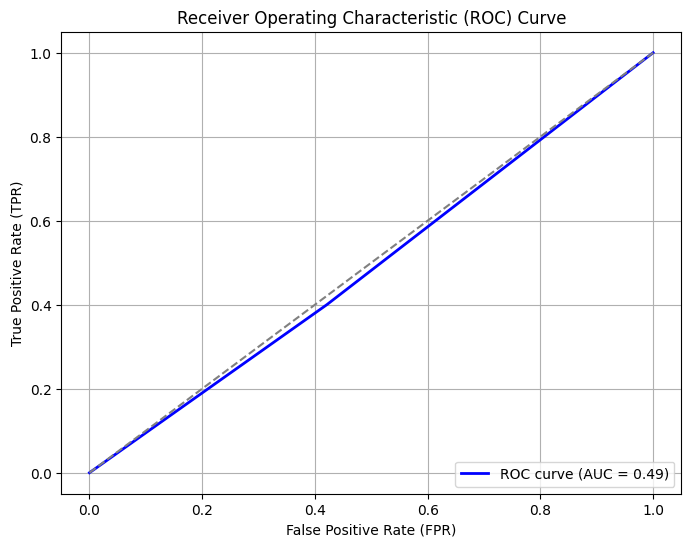

In [52]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Random guess line
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

## Random Forest

In [53]:
import pandas as pd
import numpy as np

from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [54]:
data4 = data.copy()
data4 = data4.drop(['subject_id'], axis = 1)

In [55]:
X = data4.drop(['class_information'], axis = 1)
y = data4['class_information']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 45)

XGB_classifier = XGBClassifier(random_state=45)

XGB_classifier.fit(X_train, y_train)

y_pred = XGB_classifier.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy of the XGBoost Classifier: {accuracy:.2f}')
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 45)

RF_Classifier = RandomForestClassifier(n_estimators = 100, random_state = 45)

RF_Classifier.fit(X_train, y_train)

y_pred = RF_Classifier.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy of the Random Forest Classifier: {accuracy:.2f}')

Accuracy of the XGBoost Classifier: 1.00
Accuracy of the Random Forest Classifier: 1.00


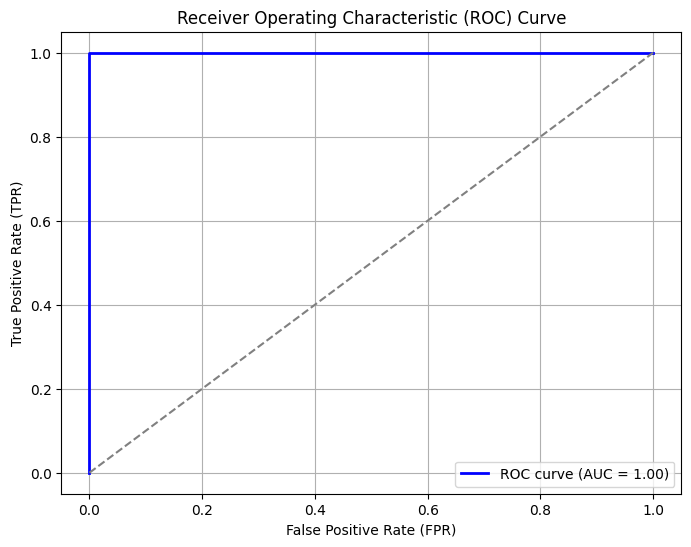

In [56]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Random guess line
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

## Naive Bayes

In [57]:
import pandas as pd
import numpy as np

from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [58]:
data4 = data.copy()
data4 = data4.drop(['subject_id'], axis = 1)

In [59]:
X = data4.drop(['class_information'], axis = 1)
y = data4['class_information']

scaler = StandardScaler()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 45)

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Naive_Bayes_classifier = GaussianNB()

Naive_Bayes_classifier.fit(X_train, y_train)

y_pred = Naive_Bayes_classifier.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy of the XGBoost Classifier: {accuracy:.2f}')

Accuracy of the XGBoost Classifier: 1.00


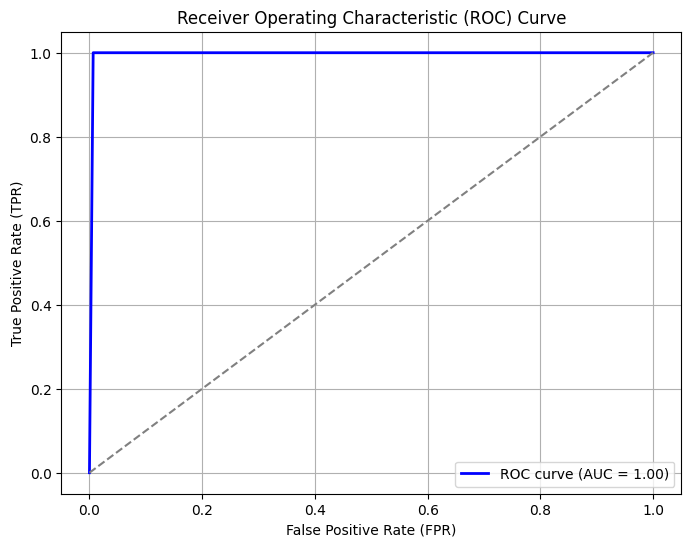

In [60]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Random guess line
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

## KNN

In [61]:
import pandas as pd
import numpy as np

from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [62]:
data4 = data.copy()
data4 = data4.drop(['subject_id'], axis = 1)

In [63]:
X = data4.drop(['class_information'], axis = 1)
y = data4['class_information']

scaler = StandardScaler()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 45)

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

knn_classifier = KNeighborsClassifier(n_neighbors=3)

knn_classifier.fit(X_train_scaled, y_train)

y_pred = knn_classifier.predict(X_test_scaled)

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy of the KNN Classifier: {accuracy:.2f}')

Accuracy of the KNN Classifier: 0.91


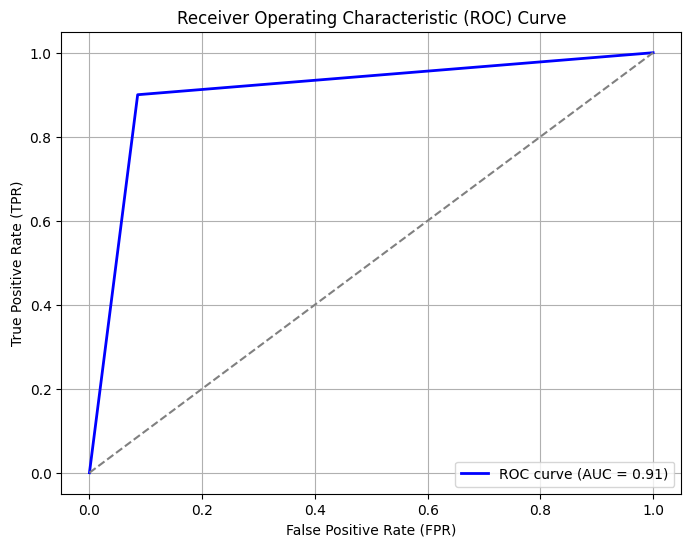

In [64]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Random guess line
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

# Combined analaysis